The Aim of the project is to recommend movies to a user based on the genre and content description.

In [27]:
import numpy as np
import pandas as pd

In [2]:
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [5]:
movies['genres'] = movies['genres'].str.replace('|',' ')
movies.head()

<ipython-input-5-53ee920cef9b>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  movies['genres'] = movies['genres'].str.replace('|',' ')


,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
mixed = pd.merge(movies,tags,on='movieId',how='left')
mixed

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1644.0,Watched,1.417737e+09
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,computer animation,1.183903e+09
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,Disney animated feature,1.183933e+09
3,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,Pixar animation,1.183935e+09
4,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,TÃ©a Leoni does not star in this movie,1.245094e+09
...,...,...,...,...,...,...
473292,131258,The Pirates (2014),Adventure,28906.0,mutiny,1.427746e+09
473293,131258,The Pirates (2014),Adventure,28906.0,pirates,1.427745e+09
473294,131258,The Pirates (2014),Adventure,28906.0,whale,1.427745e+09
473295,131260,Rentun Ruusu (2001),(no genres listed),NaN,NaN,NaN


In [7]:
mixed.drop(['timestamp'],axis =1,inplace = True)

We will now join together all the tags assigned to a particular movie given by different users, to create a large corpus which would help us to do NLP based tasks and give better training results.

In [8]:
mixed.fillna("",inplace = True)
mixed = pd.DataFrame(mixed.groupby('movieId')['tag'].apply(lambda x:"%s" % ' '.join(x)))

In [9]:
mixed.head()

,tag
movieId,
1,Watched computer animation Disney animated fea...
2,time travel adapted from:book board game child...
3,old people that is actually funny sequel fever...
4,chick flick revenge characters chick flick cha...
5,Diane Keaton family sequel Steve Martin weddin...


In [10]:
final = pd.merge(movies,mixed,on='movieId',how = 'left')
final

,movieId,title,genres,tag
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,Watched computer animation Disney animated fea...
1,2,Jumanji (1995),Adventure Children Fantasy,time travel adapted from:book board game child...
2,3,Grumpier Old Men (1995),Comedy Romance,old people that is actually funny sequel fever...
3,4,Waiting to Exhale (1995),Comedy Drama Romance,chick flick revenge characters chick flick cha...
4,5,Father of the Bride Part II (1995),Comedy,Diane Keaton family sequel Steve Martin weddin...
...,...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy,
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,
27275,131258,The Pirates (2014),Adventure,bandits Korea mutiny pirates whale
27276,131260,Rentun Ruusu (2001),(no genres listed),


In [11]:
final.fillna("",inplace = True)

We will join tags and genres together

In [12]:
final['metadata'] = final[['tag','genres']].apply(lambda x: ' '.join(x),axis = 1)

In [13]:
final.head()

,movieId,title,genres,tag,metadata
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,Watched computer animation Disney animated fea...,Watched computer animation Disney animated fea...
1,2,Jumanji (1995),Adventure Children Fantasy,time travel adapted from:book board game child...,time travel adapted from:book board game child...
2,3,Grumpier Old Men (1995),Comedy Romance,old people that is actually funny sequel fever...,old people that is actually funny sequel fever...
3,4,Waiting to Exhale (1995),Comedy Drama Romance,chick flick revenge characters chick flick cha...,chick flick revenge characters chick flick cha...
4,5,Father of the Bride Part II (1995),Comedy,Diane Keaton family sequel Steve Martin weddin...,Diane Keaton family sequel Steve Martin weddin...


In [14]:
final = final[['movieId','title','metadata']]

final

,movieId,title,metadata
0,1,Toy Story (1995),Watched computer animation Disney animated fea...
1,2,Jumanji (1995),time travel adapted from:book board game child...
2,3,Grumpier Old Men (1995),old people that is actually funny sequel fever...
3,4,Waiting to Exhale (1995),chick flick revenge characters chick flick cha...
4,5,Father of the Bride Part II (1995),Diane Keaton family sequel Steve Martin weddin...
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),bandits Korea mutiny pirates whale Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


We will converet all the letters to a lower value for uniform analysis.

In [15]:
final['metadata'] = final['metadata'].apply(lambda x:x.lower())

<ipython-input-15-4e679aed0dcd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['metadata'] = final['metadata'].apply(lambda x:x.lower())


# NLP

In [16]:
import nltk

In [17]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

In [18]:
def stem(text):
    y = []
        
    for i in text.split():
              y.append(lemma.lemmatize(i))
            
    return " ".join(y)

In [19]:
final['metadata'] = final['metadata'].apply(stem)

<ipython-input-19-f956281d7ef4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['metadata'] = final['metadata'].apply(stem)


In [20]:
final.metadata[0]

"watched computer animation disney animated feature pixar animation tã©a leoni doe not star in this movie pixar animation family tom hank pixar witty pixar adventure animated animation clever comedy computer animation family fantasy tom hank bright daring rescue fanciful heroic mission humorous light rousing toy come to life unlikely friendship warm witty animation humorous pixar time travel pixar pixar animation animation kid movie pixar pixar pixar witty disney tim allen time travel action figure action figure buzz lightyear cg animation toy toy woody animation pixar animation disney villian hurt toy pixar animation disney fantasy pixar animation pixar child é˜®ä¸€é¸£ animation computer animation funny humorous pixar tom hank witty 3d disney funny pixar time travel pixar time travel animation pixar cartoon disney toy toy pixar pixar animation pixar animated animation comedy disney pixar ya boy clever computer animation disney fantasy pixar toy witty animation cgi rated-g pixar child 

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
cv = CountVectorizer(max_features=20000,stop_words = 'english')

In [23]:
vectors = cv.fit_transform(final['metadata'])

Cosine similarity 

is a metric used to measure how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. The cosine similarity is advantageous because even if the two similar documents are far apart by the Euclidean distance (due to the size of the document), chances are they may still be oriented closer together. The smaller the angle, higher the cosine similarity. 

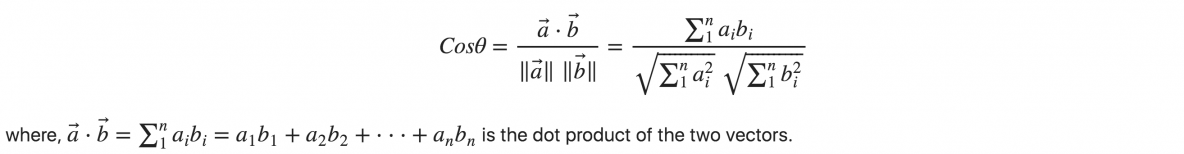

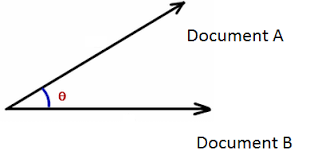

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

In [25]:
similarity = cosine_similarity(vectors)

In [45]:
pd.DataFrame(similarity)

,0,1,2,3,4,5,6,7,8,9,...,27268,27269,27270,27271,27272,27273,27274,27275,27276,27277
0,1.000000,0.103367,0.054509,0.027725,0.090828,0.012543,0.007548,0.051554,0.004315,0.017996,...,0.075443,0.474216,0.436248,0.106693,0.075443,0.106693,0.106693,0.034224,0.000000,0.087999
1,0.103367,1.000000,0.002950,0.059419,0.045581,0.003491,0.041358,0.131223,0.027740,0.009614,...,0.000000,0.000000,0.219125,0.000000,0.015749,0.000000,0.000000,0.018185,0.015749,0.205738
2,0.054509,0.002950,1.000000,0.128499,0.223237,0.002076,0.073788,0.000000,0.014997,0.023543,...,0.280976,0.187317,0.118470,0.264906,0.187317,0.264906,0.264906,0.000000,0.000000,0.000000
3,0.027725,0.059419,0.128499,1.000000,0.087594,0.003802,0.360302,0.000000,0.027462,0.018475,...,0.342997,0.171499,0.108465,0.242536,0.171499,0.242536,0.242536,0.000000,0.000000,0.000000
4,0.090828,0.045581,0.223237,0.087594,1.000000,0.001887,0.089420,0.000000,0.013631,0.018341,...,0.170251,0.170251,0.161515,0.240772,0.170251,0.240772,0.240772,0.000000,0.000000,0.069505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,0.106693,0.000000,0.264906,0.242536,0.240772,0.000000,0.061898,0.000000,0.000000,0.000000,...,0.707107,0.707107,0.447214,1.000000,0.707107,1.000000,1.000000,0.000000,0.000000,0.000000
27274,0.106693,0.000000,0.264906,0.242536,0.240772,0.000000,0.061898,0.000000,0.000000,0.000000,...,0.707107,0.707107,0.447214,1.000000,0.707107,1.000000,1.000000,0.000000,0.000000,0.000000
27275,0.034224,0.018185,0.000000,0.000000,0.000000,0.000000,0.000000,0.089087,0.000000,0.020732,...,0.000000,0.000000,0.182574,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.235702
27276,0.000000,0.015749,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


In [27]:
def recommend():
    movie = input('enter : \n')
    
    movie_index = final[final['title'] == movie].index[0]
    content_similarity = similarity[movie_index]
    movie_list = sorted(list(enumerate(content_similarity)),reverse=True,key = lambda x: x[1])[1:31]
    
    print('\n the recommended movie are : ')
    
    for i in movie_list:
        print(final.iloc[i[0]].title)

In [28]:
recommend()

enter : 
Batman Begins (2005)

 the recommended movie are : 
Dark Knight, The (2008)
Dark Knight Rises, The (2012)
Batman: Mask of the Phantasm (1993)
Batman (1989)
Batman Returns (1992)
X-Men (2000)
Superman (1978)
Spider-Man 2 (2004)
Spider-Man (2002)
X2: X-Men United (2003)
Hulk (2003)
Batman (1966)
Superman II (1980)
Spawn (1997)
Spider-Man 3 (2007)
Batman Forever (1995)
Batman & Mr. Freeze: Subzero (1998)
Harsh Times (2006)
Superman IV: The Quest for Peace (1987)
Batman Beyond: Return of the Joker (2000)
Daredevil (2003)
Superman Returns (2006)
Kick-Ass (2010)
Superman III (1983)
Batman: Mystery of the Batwoman (2003)
300 (2007)
Teenage Mutant Ninja Turtles II: The Secret of the Ooze (1991)
3:10 to Yuma (2007)
Fantastic Four (2005)
Crow: Salvation, The (2000)


In [29]:
recommend()

enter : 
Skyfall (2012)

 the recommended movie are : 
Quantum of Solace (2008)
Casino Royale (2006)
Tomorrow Never Dies (1997)
Goldfinger (1964)
Thunderball (1965)
Living Daylights, The (1987)
For Your Eyes Only (1981)
Live and Let Die (1973)
GoldenEye (1995)
Dr. No (1962)
World Is Not Enough, The (1999)
Spy Who Loved Me, The (1977)
From Russia with Love (1963)
Octopussy (1983)
You Only Live Twice (1967)
Licence to Kill (1989)
View to a Kill, A (1985)
Die Another Day (2002)
Man with the Golden Gun, The (1974)
Moonraker (1979)
Never Say Never Again (1983)
On Her Majesty's Secret Service (1969)
Casino Royale (1967)
Diamonds Are Forever (1971)
Yes, Madam (a.k.a. Police Assassins) (a.k.a. In the Line of Duty 2) (Huang gu shi jie) (1985)
American Strays (1996)
Bird of Prey (1996)
Inside (1996)
Stranger, The (1994)
Third World Cop (1999)


In [30]:
recommend()

enter : 
Avatar (2009)

 the recommended movie are : 
Flying Saucer, The (1950)
It Conquered the World (1956)
Zone 39 (1997)
Devil Girl From Mars (1954)
Rocketship X-M (1950)
Conquest of Space (1955)
Andromeda Strain, The (2008)
Morning Patrol (Proini peripolos) (1987)
On the Silver Globe (Na srebrnym globie) (1988)
Jackpot 2 (1982)
Missile to the Moon (1958)
Stonehenge Apocalypse (2010)
Magnetic Monster, The (1953)
Sol (2012) 
Arena (1989)
Alien Cargo (1999)
Operation Ganymed (1977)
Valley of the Dragons (1961)
Sharktopus vs. Pteracuda (2014)
Stereo (1969)
Alien Nation: The Udara Legacy (1997)
Starship Invasions (1977)
Electronic Labyrinth THX 1138 4EB (1967)
Alien Nation: Body and Soul (1995)
Alien Nation: The Enemy Within (1996)
Alien Nation: Millennium (1996)
Hard to Be a God (2013)
Taken (2002)
Moon Zero Two (1969)
Santa Claus (1898)


In [31]:
recommend()

enter : 
Titanic (1997)

 the recommended movie are : 
Out of Africa (1985)
Shakespeare in Love (1998)
Diary of Anne Frank, The (1959)
King's Speech, The (2010)
English Patient, The (1996)
Cavalcade (1933)
If You Could See What I Hear (1982)
Gaby: A True Story (1987)
Heavenly Forest (2006)
Diana (2013)
Bling Ring, The (2011)
Gandhi (1982)
Berlin 36 (2011)
How Green Was My Valley (1941)
Schindler's List (1993)
Catch Me If You Can (2002)
Dolphin Tale (2011)
Marty (1955)
Brokeback Mountain (2005)
Wings (1927)
Camila (1984)
From Here to Eternity (1953)
You Can't Take It with You (1938)
Wolf of Wall Street, The (2013)
Slumdog Millionaire (2008)
Amadeus (1984)
Ryan's Daughter (1970)
French Connection, The (1971)
Erin Brockovich (2000)
Queen, The (2006)


In [32]:
recommend()

enter : 
Terminator, The (1984)

 the recommended movie are : 
Terminator 2: Judgment Day (1991)
Terminator 3: Rise of the Machines (2003)
Beyond the Time Barrier (1960)
Eraser (1996)
True Lies (1994)
Commando (1985)
Total Recall (1990)
Predator (1987)
Last Action Hero (1993)
Back to the Future (1985)
Red Heat (1988)
Back to the Future Part II (1989)
Jingle All the Way (1996)
Ticking Clock (2011)
Millennium (1989)
Junior (1994)
Stargate: Continuum (2008)
Sticky Fingers of Time, The (1997)
Kindergarten Cop (1990)
Running Man, The (1987)
Bill & Ted's Excellent Adventure (1989)
Time Masters (Maîtres du temps, Les) (1982)
Twins (1988)
Ice Pirates, The (1984)
Little Girl Who Conquered Time, The (Toki o kakeru shôjo) (1983)
Frequently Asked Questions About Time Travel (2009)
Time Lapse (2014)
Time Machine, The (1960)
Déjà Vu (Deja Vu) (2006)
Looper (2012)


In [33]:
recommend()

enter : 
Iron Man (2008)

 the recommended movie are : 
Iron Man 2 (2010)
Iron Man 3 (2013)
Avengers, The (2012)
Singing Detective, The (2003)
Johnny Be Good (1988)
X-Men (2000)
In Dreams (1999)
X2: X-Men United (2003)
Less Than Zero (1987)
Avengers Confidential: Black Widow & Punisher (2014)
Heart and Souls (1993)
Chaplin (1992)
Spider-Man 2 (2004)
Sherlock Holmes (2009)
Spider-Man 3 (2007)
Fur: An Imaginary Portrait of Diane Arbus (2006)
Sherlock Holmes: A Game of Shadows (2011)
Elektra (2005)
Charlie Bartlett (2007)
Superman (1978)
Thor (2011)
X-Men Origins: Wolverine (2009)
Spider-Man (2002)
Superman II (1980)
Home for the Holidays (1995)
Guide to Recognizing Your Saints, A (2006)
Captain America: The First Avenger (2011)
X-Men: First Class (2011)
Punisher, The (2004)
Shaggy Dog, The (2006)


In [43]:
recommend()

enter : 
Sherlock Holmes (2009)

 the recommended movie are : 
Sherlock Holmes: A Game of Shadows (2011)
Singing Detective, The (2003)
Johnny Be Good (1988)
In Dreams (1999)
Heart and Souls (1993)
Chaplin (1992)
Less Than Zero (1987)
Fur: An Imaginary Portrait of Diane Arbus (2006)
Iron Man 3 (2013)
Iron Man 2 (2010)
Charlie Bartlett (2007)
Iron Man (2008)
Home for the Holidays (1995)
Guide to Recognizing Your Saints, A (2006)
Shaggy Dog, The (2006)
Avengers, The (2012)
Air America (1990)
Due Date (2010)
True Believer (1989)
Tropic Thunder (2008)
Only You (1994)
Kiss Kiss Bang Bang (2005)
Judge, The (2014)
Zodiac (2007)
The Sign of Four: Sherlock Holmes' Greatest Case (1932)
Weird Science (1985)
Gothika (2003)
Wonder Boys (2000)
Two Girls and a Guy (1997)
Best of the Best 2 (1993)
